In [146]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
import math

# 3-1

In [147]:
#### Data Preprocessing ####
# get data t
f_t = open('gp_t.csv', newline='')
t_rows = csv.reader(f_t)
data_t = []
for row in t_rows:
    data_t.append(float(row[0]))
data_t = np.array(data_t)
f_t.close()

# get data x
f_x = open('gp_x.csv', newline='')
x_rows = csv.reader(f_x)
data_x = []
for row in x_rows:
    data_x.append(float(row[0]))
data_x = np.array(data_x)
f_x.close()

#
train_x = data_x[0:50]
train_t = data_t[0:50]
test_x = data_x[50:]
test_t = data_t[50:]


# theta_set = different combination of theta_0, theta_1, theta_2, theta_3
theta_set = []
theta_set.append([0,0,0,1])
theta_set.append([1,16,0,0])
theta_set.append([1,16,0,4])
theta_set.append([1,64,32,0])
#
beta_inv = 1

In [148]:
def get_k(theta,x_n,x_m):
    # x_n, x_m is scalar here, otherwise need to calculate dist & use transpose in formula
    k = theta[0]*math.exp(-0.5*theta[1]*((x_n-x_m)**2)) + theta[2] + theta[3]*x_n*x_m
    return k
def get_C(X,theta):
    C = np.zeros([50,50])
    for n in range(50):
        for m in range(50):
            delta_nm = abs(X[n]-X[m])
            C[n][m] = get_k(theta,X[n],X[m])
            # IMPORTANT to do this
            if(n == m):
                C[n][m] += beta_inv
    return C
def get_gaussian_distr(theta,train_x,train_t,new_x):
    
    # calculate K = k(x_n,x_{n+1}) for n = 1,...,N
    K = np.zeros(50)
    for i in range(50):
        K[i] = get_k(theta,train_x[i],new_x)
    # get C_N
    C_N = get_C(train_x,theta)
    # get C_N inverse
    C_N_inv = np.linalg.inv(C_N)
    # calculate mean
    mean = np.dot(np.dot(K.reshape(1,50),C_N_inv),train_t.reshape(50,1))
    
    # get c
    c = get_k(theta,new_x,new_x) + beta_inv
    # calculate var
    var = c - np.dot(np.dot(K.reshape(1,50),C_N_inv),K.reshape(50,1))
    
    # return value
    return mean.reshape(1), var.reshape(1)
def get_RMS(mean, t):
    err = 0
    for i in range(50):
        err += (mean[i] - t[i])**2
    err = err / 50.0
    err = math.sqrt(err)
    return err

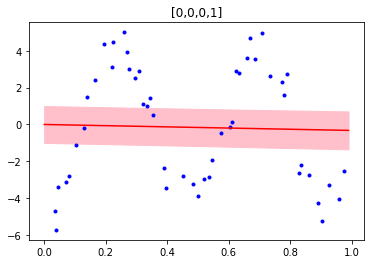

RMS error of training data: 3.1292014298222433
RMS error of test data: 3.3201767255281407


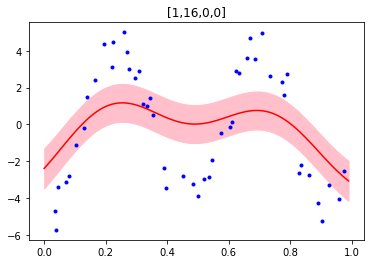

RMS error of training data: 2.4239279278312194
RMS error of test data: 2.465693787693477


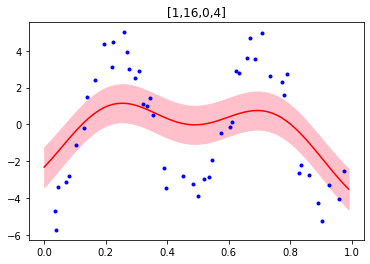

RMS error of training data: 2.4105764871252053
RMS error of test data: 2.455765087420893


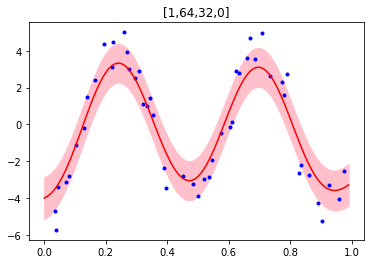

RMS error of training data: 1.0428861621832217
RMS error of test data: 1.092532557975094


In [149]:
x_list = np.arange(0, 1, 0.01)
# try each combination of theta
for i in range(4):
    # to find pink range & red line
    t_list = np.zeros(0)
    t_test_list = np.empty(0)
    std_list = np.zeros(0)
    theta = theta_set[i]
    for x in x_list:
        mean, var = get_gaussian_distr(theta,train_x,train_t,x)
        t_list = np.append(t_list,mean)
        std = math.sqrt(var)
        std_list = np.append(std_list,std)
    lower = t_list - std_list
    upper = t_list + std_list
    # plot
    plt.fill_between(x_list, lower, upper, color = 'pink')
    plt.scatter(train_x, train_t, color = 'blue', marker = '.')
    plt.plot(x_list, t_list, color = 'red')
    plt.title("["+str(theta[0])+","+str(theta[1])+","+str(theta[2])+","+str(theta[3])+"]")
    plt.show()
    
    # show RMS of training & test data
    train_mean = np.zeros(0)
    test_mean = np.zeros(0)
    for x in train_x:
        mean, var = get_gaussian_distr(theta,train_x,train_t,x)
        train_mean = np.append(train_mean,mean)
    for x in test_x:
        mean, var = get_gaussian_distr(theta,test_x,test_t,x)
        test_mean = np.append(test_mean,mean)
    train_rms = get_RMS(train_mean, train_t)
    test_rms = get_RMS(test_mean, test_t)
    print("RMS error of training data:",train_rms)
    print("RMS error of test data:",test_rms)

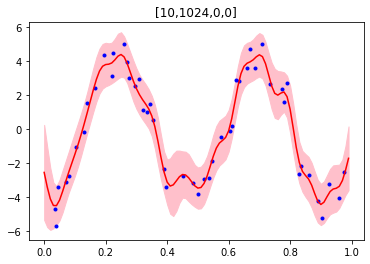

1.3189276960969694
RMS error of training data: 0.515374975320969
RMS error of test data: 0.6415945088085986


In [201]:
# Tuning theta to find best combination
theta = [10,1024,0,0]
# to find pink range & red line
t_list = np.zeros(0)
t_test_list = np.empty(0)
std_list = np.zeros(0)
for x in x_list:
    mean, var = get_gaussian_distr(theta,train_x,train_t,x)
    t_list = np.append(t_list,mean)
    std = math.sqrt(var)
    std_list = np.append(std_list,std)
lower = t_list - std_list
upper = t_list + std_list
# plot
plt.fill_between(x_list, lower, upper, color = 'pink')
plt.scatter(train_x, train_t, color = 'blue', marker = '.')
plt.plot(x_list, t_list, color = 'red')
plt.title("["+str(theta[0])+","+str(theta[1])+","+str(theta[2])+","+str(theta[3])+"]")
plt.show()
print(sum(std_list)/100)
# show RMS of training & test data
train_mean = np.zeros(0)
test_mean = np.zeros(0)
for x in train_x:
    mean, var = get_gaussian_distr(theta,train_x,train_t,x)
    train_mean = np.append(train_mean,mean)
for x in test_x:
    mean, var = get_gaussian_distr(theta,test_x,test_t,x)
    test_mean = np.append(test_mean,mean)
train_rms = get_RMS(train_mean, train_t)
test_rms = get_RMS(test_mean, test_t)
print("RMS error of training data:",train_rms)
print("RMS error of test data:",test_rms)

# 3-2

In [350]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [351]:
### Read file ###
# get data t
f = open('t_train.csv')
t_rows = csv.reader(f)
data_t = []
for row in t_rows:
    data_t.append([float(r) for r in row])
data_t = np.array(data_t)
f.close()
# get data x
f = open('x_train.csv')
x_rows = csv.reader(f)
data_x = []
for row in x_rows:
    data_x.append([float(r) for r in row])
data_x = np.array(data_x)
f.close()

In [352]:
# do PCA to k dimension
def do_PCA(data,K):
    cov = np.cov(data_x.T)
    eig_val, eig_vec = np.linalg.eig(cov)
    data_pca = np.dot(data,eig_vec[:,:K].real)
    for k in range(K):
        mean = np.mean(data_pca[:,k])
        std = np.std(data_pca[:,k])
        data_pca[:,k] = (data_pca[:,k] - mean)/std
    return data_pca

In [353]:
data_pca = do_PCA(data_x,2)

In [354]:
# group_t = [-1]*100, [1]*100
group_t = [-1]*100
for i in range(100):
    group_t.append(1)
group_t = np.array(group_t)
# make group01,group02,group12 to train 3 different SVM for 1-VS-1 scheme
group01_x = np.array(data_pca[:200])
group12_x = np.array(data_pca[100:300])
group02_x = []
for i in range(100):
    group02_x.append(data_pca[i])
for i in range(200,300):
    group02_x.append(data_pca[i])
group02_x = np.array(group02_x)

In [355]:
def kernel(xi,xj,kernel_type):
    if(kernel_type == 0): # linear kernel
        return np.array(np.dot(xi,xj.T))
    else: # polynomial kernel
        return np.array(np.dot(xi,xj.T)**2)
def kernel_func(x,sup_v,kernel_type):
    result = []
    for i in range(len(sup_v)):
        result.append(kernel(x,sup_v[i],kernel_type))
    return np.array(result)
def predict(at,sup_v,b,x,kernel_type,svm_type):
    # NOTICE: according to text book, only support vectors will influence the prediction result!
    y = 0.0
    y = np.dot(at,kernel_func(x,sup_v,kernel_type))
    y += b
    if(svm_type == '01'):
        if(y >= 0):
            return 1
        else:
            return 0
    elif(svm_type == '12'):
        if(y >= 0):
            return 2
        else:
            return 1
    else: # svm_type == '02'
        if(y >= 0):
            return 2
        else:
            return 0
def majority_vote(predict_list):
    return np.argmax(predict_list)
def build_test_data():
    interval = 0.05
    result = []
    for i in range(-40,40):
        for j in range(-40,40):
            tmp = [i*interval,j*interval]
            result.append(tmp)
    return np.array(result)

In [356]:
# build linear svm for class 01,12,01
linear_svm = []
linear_sup_v = []
linear_at = []
linear_b = []
linear_svm.append(SVC(kernel = 'linear'))
linear_svm.append(SVC(kernel = 'linear'))
linear_svm.append(SVC(kernel = 'linear'))
linear_svm[0].fit(group01_x,group_t)
linear_svm[1].fit(group12_x,group_t)
linear_svm[2].fit(group02_x,group_t)
for i in range(3):
    linear_sup_v.append(linear_svm[i].support_vectors_)
    linear_at.append(linear_svm[i].dual_coef_) # langrange coefficient(a) * label(t) for each support vector
    linear_b.append(linear_svm[i].intercept_)
# build polynomial svm for class 01,12,01
poly_svm = []
poly_sup_v = []
poly_at = []
poly_b = []
poly_svm.append(SVC(kernel = 'poly',degree = 2))
poly_svm.append(SVC(kernel = 'poly',degree = 2))
poly_svm.append(SVC(kernel = 'poly',degree = 2))
poly_svm[0].fit(group01_x,group_t)
poly_svm[1].fit(group12_x,group_t)
poly_svm[2].fit(group02_x,group_t)
for i in range(3):
    poly_sup_v.append(poly_svm[i].support_vectors_)
    poly_at.append(poly_svm[i].dual_coef_) # langrange coefficient(a) * label(t) for each support vector
    poly_b.append(poly_svm[i].intercept_)

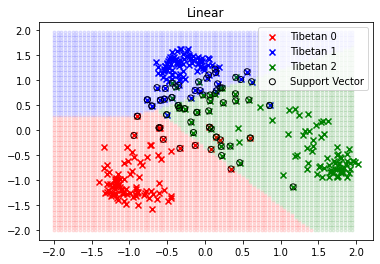

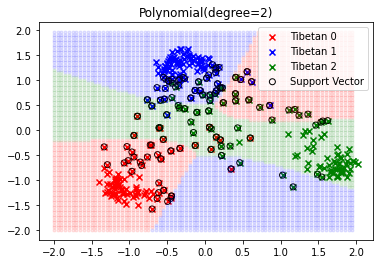

In [358]:
# Plot the corresponding decision boundary and support vector.
# Linear Version of SVM
test_data = build_test_data()
class0_train = []
class1_train = []
class2_train = []
sup_v = []
for i in range(len(test_data)):
    predict_list = [0,0,0]
    predict_list[predict(linear_at[0],linear_sup_v[0],linear_b[0],test_data[i],0,'01')] += 1
    predict_list[predict(linear_at[1],linear_sup_v[1],linear_b[1],test_data[i],0,'12')] += 1
    predict_list[predict(linear_at[2],linear_sup_v[2],linear_b[2],test_data[i],0,'02')] += 1
    p = majority_vote(predict_list)
    if(p == 0):
        plt.plot(test_data[i][0],test_data[i][1],color='red',marker='.',alpha=0.1)
    elif(p == 1):
        plt.plot(test_data[i][0],test_data[i][1],color='blue',marker='.',alpha=0.1)
    else:
        plt.plot(test_data[i][0],test_data[i][1],color='green',marker='.',alpha=0.1)
for i in range(300):
    if(data_t[i][0] == 0):
        class0_train.append(data_pca[i])
    if(data_t[i][0] == 1):
        class1_train.append(data_pca[i])
    if(data_t[i][0] == 2):
        class2_train.append(data_pca[i])
for i in range(3):
    for j in range(len(linear_sup_v[i])):
        sup_v.append(linear_sup_v[i][j])
#
plt.title("Linear")
class0_train = np.array(class0_train)
class1_train = np.array(class1_train)
class2_train = np.array(class2_train)
sup_v = np.array(sup_v)
#
plt.scatter(class0_train[:,0],class0_train[:,1],color='red', marker='x', label = 'Tibetan 0')
plt.scatter(class1_train[:,0],class1_train[:,1],color='blue', marker='x', label = 'Tibetan 1')
plt.scatter(class2_train[:,0],class2_train[:,1],color='green', marker='x', label = 'Tibetan 2')
plt.scatter(sup_v[:,0],sup_v[:,1],marker='o',color='None',edgecolor='black', label = 'Support Vector')
#
plt.legend()
plt.show()

# Plot the corresponding decision boundary and support vector.
# Poly Version of SVM
sup_v = []
for i in range(len(test_data)):
    predict_list = [0,0,0]
    predict_list[predict(poly_at[0],poly_sup_v[0],poly_b[0],test_data[i],1,'01')] += 1
    predict_list[predict(poly_at[1],poly_sup_v[1],poly_b[1],test_data[i],1,'12')] += 1
    predict_list[predict(poly_at[2],poly_sup_v[2],poly_b[2],test_data[i],1,'02')] += 1
    p = majority_vote(predict_list)
    if(p == 0):
        plt.plot(test_data[i][0],test_data[i][1],color='red',marker='.',alpha=0.1)
    elif(p == 1):
        plt.plot(test_data[i][0],test_data[i][1],color='blue',marker='.',alpha=0.1)
    else:
        plt.plot(test_data[i][0],test_data[i][1],color='green',marker='.',alpha=0.1)
for i in range(3):
    for j in range(len(poly_sup_v[i])):
        sup_v.append(poly_sup_v[i][j])
sup_v = np.array(sup_v)
#
plt.title("Polynomial(degree=2)")
plt.scatter(class0_train[:,0],class0_train[:,1],color='red', marker='x', label = 'Tibetan 0')
plt.scatter(class1_train[:,0],class1_train[:,1],color='blue', marker='x', label = 'Tibetan 1')
plt.scatter(class2_train[:,0],class2_train[:,1],color='green', marker='x', label = 'Tibetan 2')
plt.scatter(sup_v[:,0],sup_v[:,1],marker='o',color='None',edgecolor='black', label = 'Support Vector')
#
plt.legend(loc='upper right')
plt.show()

# 3-3

In [110]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import math

In [111]:
# read img
img = cv2.imread('imghw3.jpg')
# plt.imshow(img)
# plt.show()
height = img[:,-1,-1].size
width = img[-1,:,-1].size
# normalize data
img = img /255
#
max_iter_num = 100
MAGIC_NUMBER = 100

In [112]:
# for K-means
def get_dist(x,y):
    # x,y: 3-Dim vector
    dist = 0.0
    for i in range(3):
        dist += (x[i] - y[i])**2
    dist = math.sqrt(dist)
    return dist
def do_k_means(K,img,max_iter_num):
    # get first k mu randomly
    mu = np.zeros([0,3])
    for i in range(K):
        x = random.randint(0,height-1)
        y = random.randint(0,width-1)
        mu = np.insert(mu,0,values=img[x][y],axis=0)
    # do iteration to find best mu
    r_table = np.zeros([height,width]) # store r_nk
    cnt_list = np.zeros(K)
    prev_j = 0.0
    cur_j = 0.0
    for i in range(max_iter_num):
        # try to minimize this j
        sum_list = np.zeros([K,3])
        cnt_list = np.zeros(K)
        for x in range(height):
            for y in range(width):
                min_dist = 100
                min_k = -1
                for k in range(K):
                    d = get_dist(img[x][y],mu[k])
                    if(d < min_dist):
                        min_k = k
                        min_dist = d
                r_table[x][y] = min_k
                cnt_list[min_k] += 1
                sum_list[min_k] += img[x][y]
        # update mu
        for k in range(K):
            if(cnt_list[k] != 0):
                mu[k] = sum_list[k] / cnt_list[k]
        # calculate j
        for x in range(height):
            for y in range(width):
                cur_j += np.sum((img[x][y] - mu[int(r_table[x][y])])**2)
        if(abs(cur_j-prev_j) < MAGIC_NUMBER):
            break
        else:
            d = abs(cur_j - prev_j)
            prev_j = cur_j.copy()
            cur_j = 0.0
    return mu, r_table, cnt_list    
def build_new_image(mu,r_table):
    mu = mu
    new_img = np.zeros([height,width,3]) # new image
    for x in range(height):
        for y in range(width):
            k = int(r_table[x][y])
            new_img[x][y] = mu[k]
    return new_img


In [118]:
# for GMM
from scipy.stats import multivariate_normal as norm
def initialize_GMM(r_table,cnt_list,mu,img,K):
    N = width*height
    # get pi
    pi = cnt_list / N
    # get mu
    mu = mu
    # get sigma
    r_list = r_table.reshape(N)
    img_list = img.reshape(N,3)
    sigma = []
    for k in range(K):
        sigma.append(np.array(np.cov(np.array(img_list[np.where(r_list[:]==k)]).T)))
    sigma = np.array(sigma)
    return pi, mu, sigma
def do_E_step(pi,mu,sigma,K):
    N = width*height 
    # get responsibility
    img_list = img.reshape(N,3)
    norm_img_list = np.array([norm(mu[k],sigma[k]).pdf(img_list) for k in range(K)])
    denominator = np.dot(pi.reshape(1,K),norm_img_list).reshape(N)
    r = np.array([pi[k]*norm_img_list[k] / denominator for k in range(K)])
    return r
def do_M_step(r,pi,mu,sigma,K):
    N = width*height
    img_list = img.reshape(N,3)
    # get N_k
    N_k = np.zeros(K)
    for k in range(K):
        N_k[k] = np.sum(r[k])
    # get new mu
    new_mu = np.sum(np.array([np.dot(r[k].reshape(1,N),img_list/N_k[k]) for k in range(K)]),axis=1)
    # get new sigma
    new_sigma = []
    for k in range(K):
        sigma_k = np.zeros((3,3))
        for n in range(N):
            tmp = np.dot((img_list[n] - new_mu[k]).reshape(3,1),(img_list[n] - new_mu[k]).reshape(1,3))
            sigma_k += r[k][n]*tmp
        new_sigma.append(sigma_k/N_k[k])
    new_sigma = np.array(new_sigma)
    # get new pi
    new_pi = N_k / N
    return new_pi, new_mu, new_sigma
def evaluate(pi,mu,sigma,K):
    N = width*height
    img_list = img.reshape(N,3)
    norm_img_list = np.array([norm(mu[k],sigma[k]).pdf(img_list) for k in range(K)])
    new_mu = mu.copy()
    new_sigma = sigma.copy()
    error = 0.0
    for n in range(N):
        tmp = 0.0
        for k in range(K):
            tmp += pi[k]*norm_img_list[k][n]
        tmp = np.log(tmp)
        error += tmp
    return error, new_mu, new_sigma

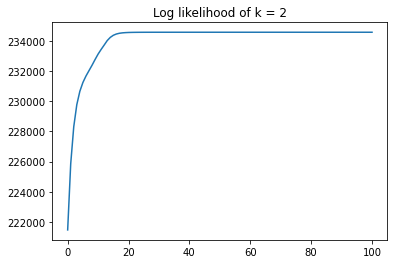

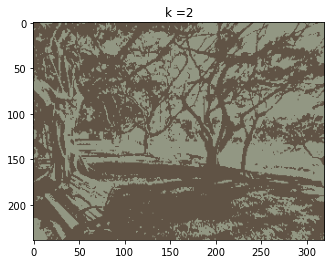

*** Table of k = 2 ***
R	G	B
-----------------------
131	151	146
69	83	96


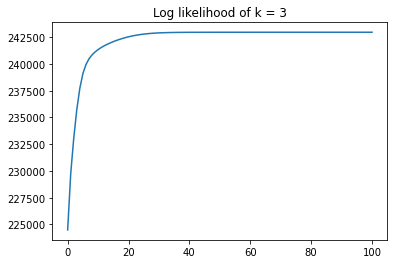

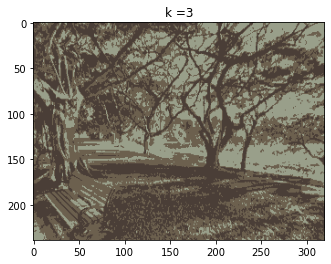

*** Table of k = 3 ***
R	G	B
-----------------------
55	62	74
78	96	108
138	159	153


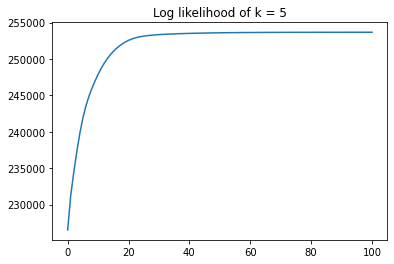

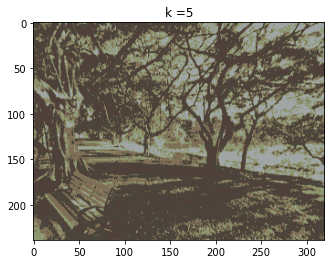

*** Table of k = 5 ***
R	G	B
-----------------------
165	165	160
112	151	141
59	70	74
58	65	79
86	111	126


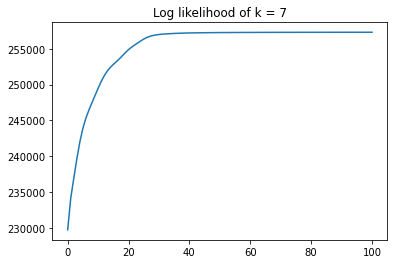

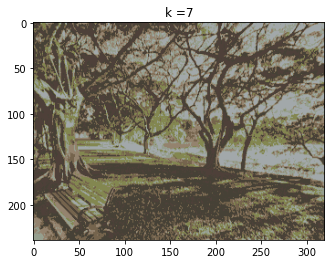

*** Table of k = 7 ***
R	G	B
-----------------------
77	100	117
110	131	148
170	168	162
57	64	78
142	159	150
80	135	131
54	65	70


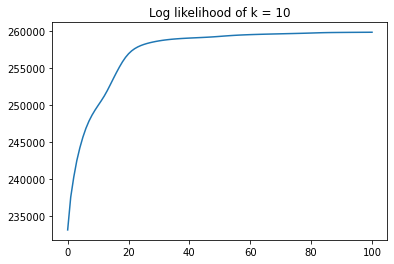

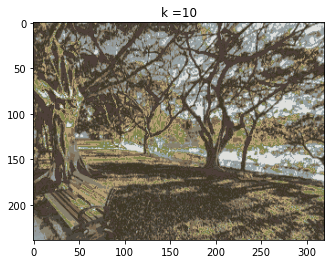

*** Table of k = 10 ***
R	G	B
-----------------------
157	155	149
167	164	151
58	64	78
37	56	62
118	160	182
81	105	124
66	75	80
221	224	223
75	132	128
109	128	135


In [119]:
k_list = [2,3,5,7,10]
x = range(101)
for k in k_list:
    mu, r_table, cnt_list = do_k_means(k,img,max_iter_num)
    # EM algorithm
    pi, mu, sigma = initialize_GMM(r_table,cnt_list,mu,img,k)
    err_list = []
    err, mu, sigma = evaluate(pi,mu,sigma,k)
    err_list.append(err)
    for i in range(100): 
        r = do_E_step(pi,mu,sigma,k)
        pi, mu, sigma = do_M_step(r,pi,mu,sigma,k)
        err, mu, sigma = evaluate(pi,mu,sigma,k)
        err_list.append(err)
    # plot log likelihood
    plt.plot(x,err_list)
    plt.title("Log likelihood of k = "+str(k))
    plt.show()
    # draw graph
    new_img = build_new_image(mu,r_table)
    # BGR to RGB
    new_img = new_img[:,:,::-1]
    plt.title("k ="+str(k))
    plt.imshow(new_img)
    plt.show()
    # show table
    print("*** Table of k =",k,"***")
    print("R\tG\tB")
    print("-----------------------")
    for i in range(k):
        print(int(mu[i][0]*255),int(mu[i][1]*255),int(mu[i][2]*255),sep="\t")